In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [36]:
n_samples = 100
random_state = 170
center_points = [[1, 1], [-1, -1], [1, -1,]]

X, y = make_blobs(n_samples = n_samples, random_state = random_state, centers = center_points, cluster_std = 0.6)
print(X.shape, y.shape)

(100, 2) (100,)


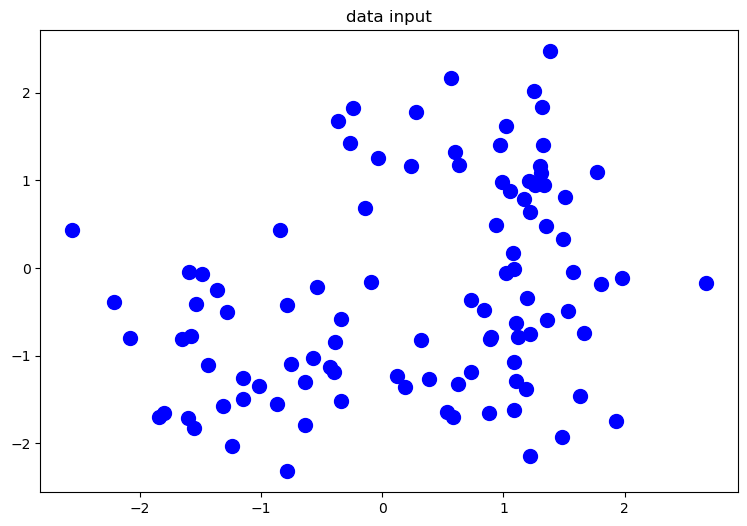

In [15]:
plt.figure(figsize = (9, 6))
plt.title('data input')
plt.scatter(X[:, 0], X[:, 1], color = 'blue', s = 100)
plt.show()

In [26]:
def k_means_init(X, n_cluster):
    n_samples, n_features = X.shape
    centroid = np.empty((n_cluster, n_features), dtype = X.dtype)
    avg_point = sum(X) / len(X)
    first_id = np.argmax(euclidean_distances([avg_point], X, squared = True))
    centroid[0] = X[first_id]
    for i in range(1, n_cluster):
        center_id = np.argmax(np.min(euclidean_distances(centroid[:i], X, squared = True), axis = 0))
        centroid[i] = X[center_id]
    return centroid.tolist()
n_centroid = k_means_init(X, 3)
print(n_centroid)

[[1.3836252481600562, 2.472385503005777], [-1.8436371976200112, -1.693538693248048], [1.930981677439216, -1.7409580279152177]]


In [51]:
def k_means(X, n_cluster):
    samples = X.shape[0]
    best_centroid = None
    curr_centroid = k_means_init(X, n_cluster)
    samples_label = np.empty(samples, dtype = int)
    while(best_centroid != curr_centroid):
        best_centroid = curr_centroid
        distance = euclidean_distances(X, best_centroid, squared = True)
        for i in range(samples):
            samples_label[i] = np.argmin(distance[i])
        for i in range(n_cluster):
            idx = np.where(samples_label == i)[0]
            curr_label_i = X[idx]
            curr_centroid[i] = sum(curr_label_i) / len(curr_label_i)
            curr_centroid[i] = curr_centroid[i].tolist()
    return np.asarray(best_centroid), samples_label
kmean, label = k_means(X, 3)
print(kmean)

[[ 0.8610048   1.25934367]
 [-1.13949326 -0.97100768]
 [ 1.12129576 -0.87895976]]


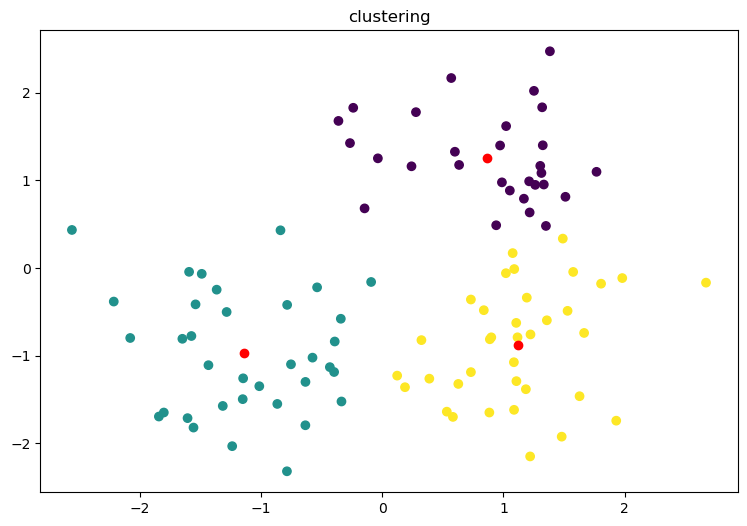

In [57]:
plt.figure(figsize = (9, 6))
plt.title("clustering")
plt.scatter(X[:, 0], X[:, 1], c = label)
plt.scatter(kmean[:, 0], kmean[:, 1], c = 'r')
plt.show()